In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from utils import Cifar10

import warnings
warnings.filterwarnings("ignore")

path = "../data/cifar-10-batches-py"

# Load Data

In [2]:
dataset = Cifar10(path)

# Reducing the dimensionality of the data using PCA

Below is the code to load the flattened images and labels of CIFAR-10 dataset. The images are flattened to a vector of 3072 elements (32x32x3). PCA is applied to reduce the dimensionality of the data to 128, with over 90% of the variance explained.

In [3]:
X_train, y_train = dataset.get_train(flatten=True)
X_test, y_test = dataset.get_test(flatten=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 3072), (50000,), (10000, 3072), (10000,))

You can change the number of components to any number here, as long as it is between 1 and 3072. 

Please pay attention to the trade-off between the number of dimensions and the cumulative variance explained contribution!

In [4]:
n_components = 128

In [5]:
pca = PCA(n_components=n_components)
pca.fit(X_train)
pca.explained_variance_ratio_.sum()

0.91842909304927

In [6]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape, X_test_pca.shape

((50000, 128), (10000, 128))

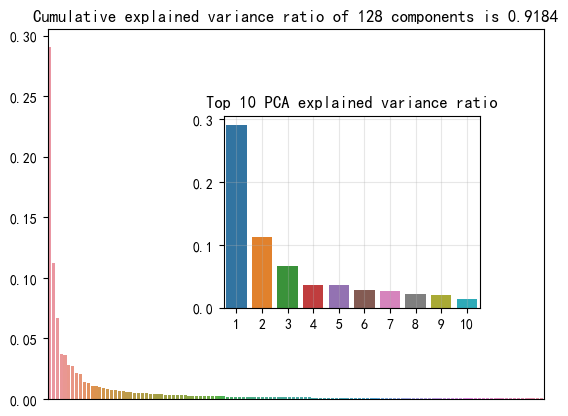

In [7]:
sns.barplot(x=np.arange(1, 129), y=pca.explained_variance_ratio_)
plt.title(f"Cumulative explained variance ratio of {n_components} components is {pca.explained_variance_ratio_.sum():.4f}")
plt.xticks([])
plt.axes([0.4, 0.3, 0.4, 0.4])
sns.barplot(x=np.arange(1, 11), y=pca.explained_variance_ratio_[:10])
plt.title("Top 10 PCA explained variance ratio")
plt.grid(alpha=0.3)
plt.show()

# Standardize the data

In [8]:
std = StandardScaler()
std.fit(X_train_pca)
X_train_pca_std = std.transform(X_train_pca)
X_test_pca_std = std.transform(X_test_pca)
X_train_pca_std.shape, X_test_pca_std.shape

((50000, 128), (10000, 128))

# Your code goes here